In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('csv/data.csv')
df[:100]

,Unnamed: 0,word,lemma,pos_tag,freq
0,0,ამ,ეს,Pron,1041654
1,1,ზამთრის,ზამთარი,N,8035
2,2,მიწურულს,მიწურული,Dat,5976
3,3,თითქმის,თითქმის,Adv,62608
4,4,სასოწარკვეთილი,სასოწარკვეთილი,A,844
...,...,...,...,...,...
95,105,შუბლზე,შუბლი,N,1697
96,106,ვაკოცე,კოცნა,V,174
97,107,როგორც,როგორც,Cj,478016
98,108,ჩანს,*ჩენა,V,57172


In [3]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარი,N,8035
2,მიწურულს,მიწურული,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილი,A,844
...,...,...,...,...
1468488,რედაქტორებამდე,რედაქტორი,N,1
1468489,წაეჩხუბებით,წაჩხუბი,V,1
1468490,აგვწონეს,აწონა,V,1
1468491,ტორონჯაძისა,ტორონჯაძე,N,1


In [4]:
df.query("word == 'თქმა'")

,word,lemma,pos_tag,freq
2978,თქმა,\t,<MWE>,82436


In [5]:
df.query("pos_tag.str.startswith('PP')")

,word,lemma,pos_tag,freq
6136,ვისთან,ვინ,PP,3150
20282,თავისთან,თავისი,PP,1383
87035,ვისთანმე,ვინ,PP,22
102342,თავისთანაც,თავისი,PP,10
114294,უფროსებში,უფროსი,PP,281
128902,მანანასთან,მანანა,PP,31
133297,უფროსებთან,უფროსი,PP,249
166006,უფროსებზე,უფროსი,PP,42
580018,დელისთან,დელისი,PP,52
625563,აღარავისთან,აღარავინ,PP,13


In [6]:
junk = ['Foreign', 'Unknown', '>XCOMP', 'Symbol', 'Guess', '<MWE>', 'X', 'Punct']
# SG -> a LOT. PL -> a LOT.
df.query("pos_tag == 'Rel:ც'")

,word,lemma,pos_tag,freq
75115,ურომლისოდაც,ურომლისოდაც,Rel:ც,454


In [7]:
df.groupby(by='pos_tag').pos_tag.count()

pos_tag
<MWE>              190
>XCOMP               1
A               204610
Abs                  2
Adv               6181
                 ...  
Unknown             15
Unrecognized        46
V               407981
Voc                232
X                    1
Name: pos_tag, Length: 64, dtype: int64

In [8]:
main_pos = ['N', 'V', 'Adv', 'A', 'Num', 'Pron', 'Cj', 'Interj']

In [9]:
def convert(tag):
    try:
        return {"Nom":"N", "Dat":"N", "Gen":"N", "Erg":"N", "Voc":"N", "Inst":"N", "Foc":"Adv"}[tag]
    except KeyError:
        if tag in main_pos:
            return tag
        return 'Other'

df.pos_tag = df.pos_tag.agg(convert)

<Axes: xlabel='word', ylabel='pos_tag'>

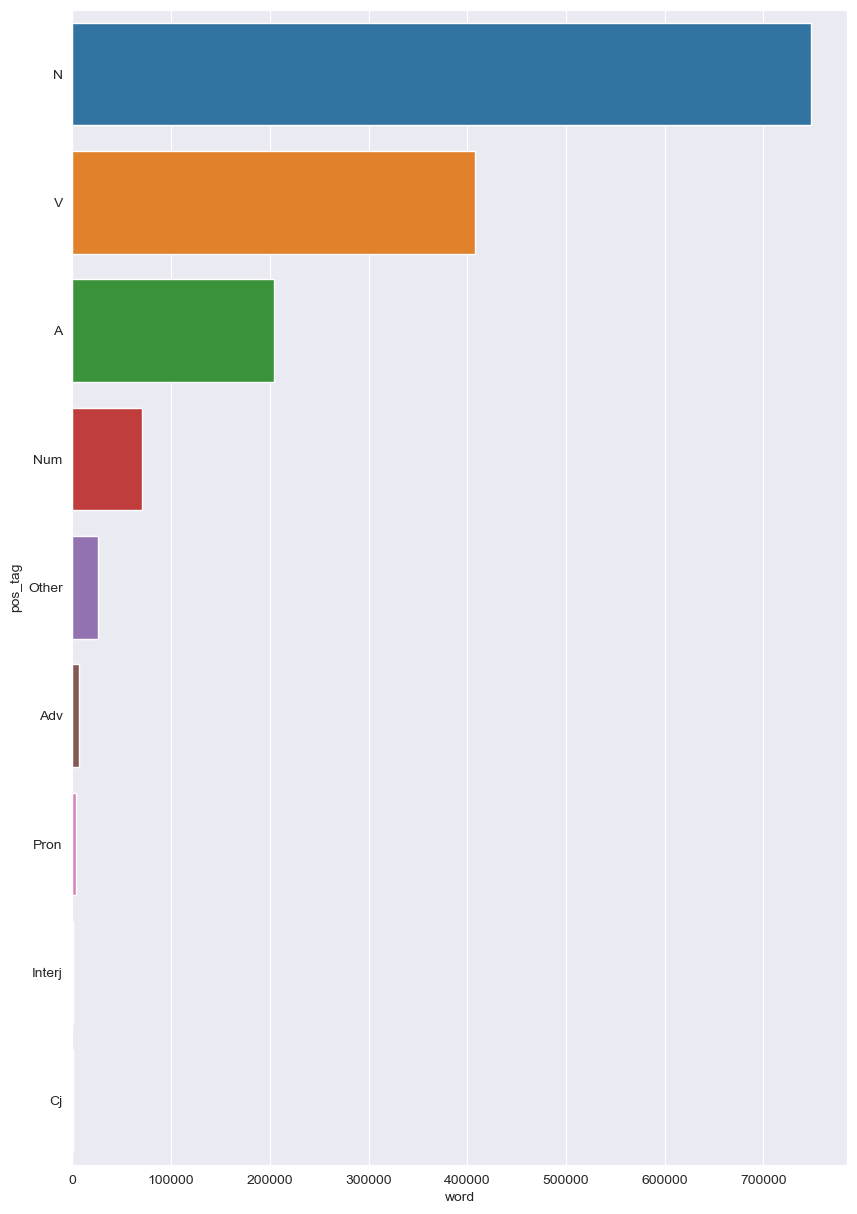

In [10]:
plt.figure(figsize=(10, 15))
sns.barplot(data=df.groupby(by="pos_tag")["word"].count().reset_index().sort_values(by="word", ascending=False), y="pos_tag", x="word")

## სიტყვის სიგრძეები

In [11]:
df['word_length'] = df.word.str.len()
df['lemma_length'] = df.lemma.str.len()
df['ratio'] = df['word_length'] / df['lemma_length']
df[['word', 'ratio', 'word_length', 'lemma_length']]

,word,ratio,word_length,lemma_length
0,ამ,1.000000,2,2
1,ზამთრის,1.000000,7,7
2,მიწურულს,1.000000,8,8
3,თითქმის,1.000000,7,7
4,სასოწარკვეთილი,1.000000,14,14
...,...,...,...,...
1468488,რედაქტორებამდე,1.555556,14,9
1468489,წაეჩხუბებით,1.571429,11,7
1468490,აგვწონეს,1.600000,8,5
1468491,ტორონჯაძისა,1.222222,11,9


max: 44, min: 1


<Axes: xlabel='lemma_length', ylabel='count'>

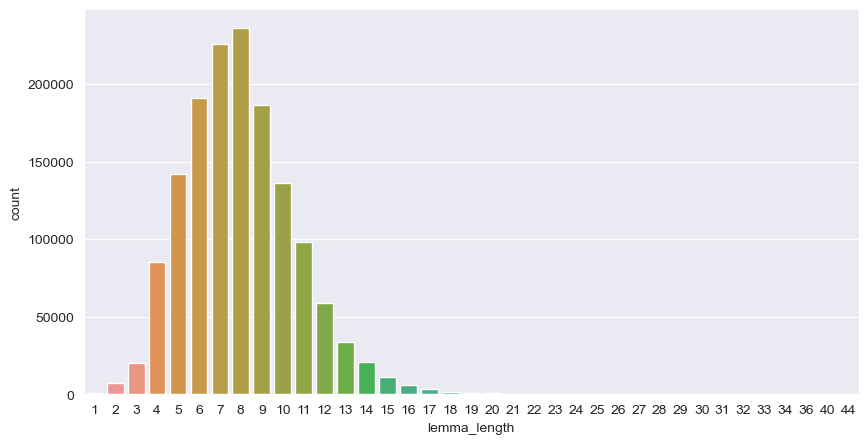

In [12]:
print(f'max: {df["lemma_length"].max()}, min: {df["lemma_length"].min()}')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='lemma_length')

In [13]:
df.lemma_length.quantile(q=[ i / 100 for i in range(1, 100)])

0.01     3.0
0.02     4.0
0.03     4.0
0.04     4.0
0.05     4.0
        ... 
0.95    13.0
0.96    13.0
0.97    14.0
0.98    14.0
0.99    15.0
Name: lemma_length, Length: 99, dtype: float64

In [14]:
df['lemma_length_category'] = pd.qcut(df.lemma_length, [0, 0.33, 0.67, 1], labels=['low', 'medium', 'high'])

max: 45, min: 1


<Axes: xlabel='word_length', ylabel='count'>

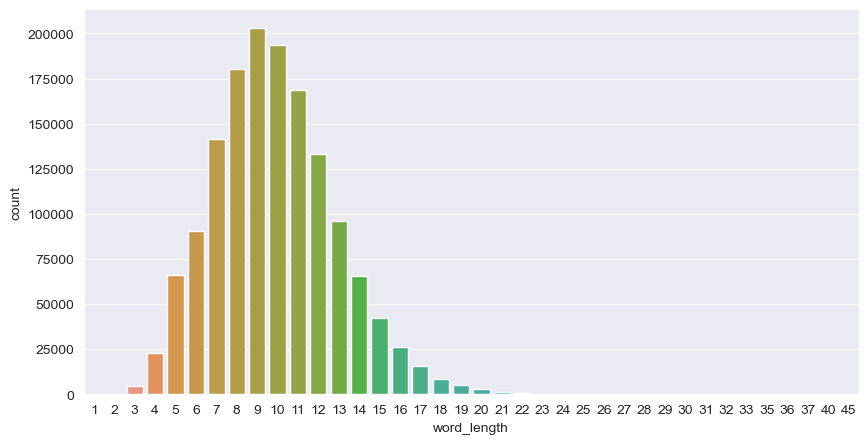

In [15]:
print(f'max: {df["word_length"].max()}, min: {df["word_length"].min()}')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='word_length')

In [16]:
df['word_length_category'] = pd.qcut(df.word_length, [0, 0.33, 0.67, 1], labels=['low', 'medium', 'high'])

Text(0.5, 0, '')

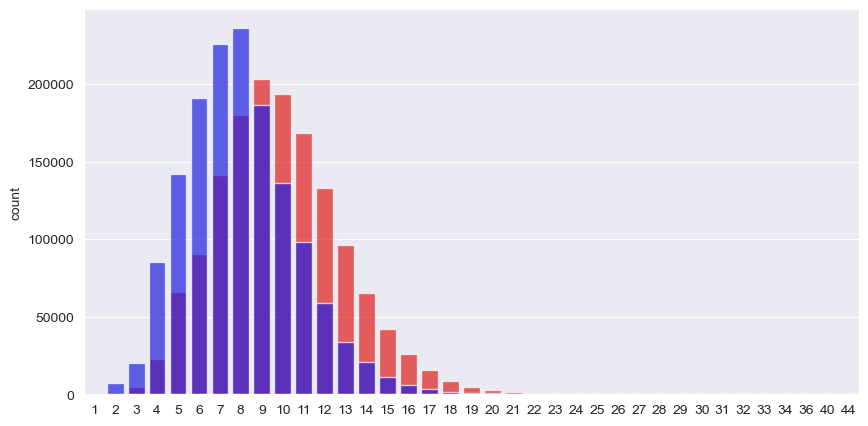

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='word_length', color='red', alpha=0.7)
sns.countplot(data=df, x='lemma_length', color='blue', alpha=0.7)
plt.xlabel("")

max: 18.0, min: 0.10526315789473684


<Axes: xlabel='ratio', ylabel='Count'>

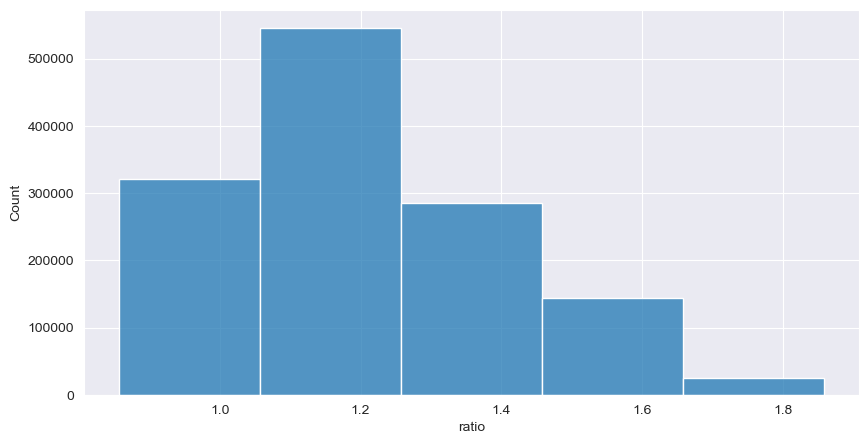

In [18]:
print(f'max: {df["ratio"].max()}, min: {df["ratio"].min()}')
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df.ratio.between(*list(df.ratio.quantile([.01, .9])))], x='ratio', binwidth=0.2, stat='count')

In [19]:
df['ratio'].quantile()

1.2

In [20]:
conditions = [
    df['ratio'] < 1,
    df['ratio'] == 1,
    df['ratio'] > 1
]
choices = ['less', 'equal', 'greater']
df['ratio_category'] = np.select(conditions, choices)

<Axes: xlabel='ratio_category', ylabel='count'>

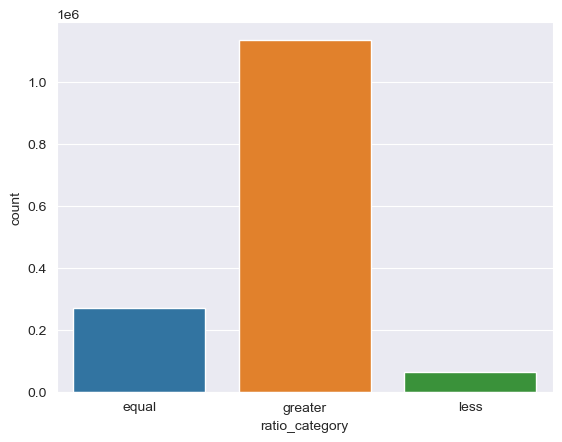

In [21]:
sns.countplot(df, x='ratio_category')

In [22]:
df.query('ratio_category == "greater"')

,word,lemma,pos_tag,freq,word_length,lemma_length,ratio,lemma_length_category,word_length_category,ratio_category
5,გახლდით,ხლება,V,1689,7,5,1.400000,low,low,greater
7,ხანია,ხანი,N,24507,5,4,1.250000,low,low,greater
10,ქალიშვილის,ქალიშვილი,N,1485,10,9,1.111111,medium,medium,greater
11,რახელის,რახელ,N,39,7,5,1.400000,low,low,greater
12,ამხანაგები,ამხანაგი,N,503,10,8,1.250000,medium,medium,greater
...,...,...,...,...,...,...,...,...,...,...
1468488,რედაქტორებამდე,რედაქტორი,N,1,14,9,1.555556,medium,high,greater
1468489,წაეჩხუბებით,წაჩხუბი,V,1,11,7,1.571429,low,medium,greater
1468490,აგვწონეს,აწონა,V,1,8,5,1.600000,low,low,greater
1468491,ტორონჯაძისა,ტორონჯაძე,N,1,11,9,1.222222,medium,medium,greater


## სხვათა სიტყვათა ფორმები

In [23]:
reported_speech_candidates = df[df.word.str.endswith('ო')].copy()
reported_speech_candidates['word'] = reported_speech_candidates.word.str[:-1]
reported_speech_candidates = reported_speech_candidates[reported_speech_candidates.word.isin(df.word)]
third_person_reported_speech = df.index.isin(reported_speech_candidates[reported_speech_candidates.word.isin(pd.merge(reported_speech_candidates, df, on=['word', 'lemma', 'pos_tag'], how='inner').word)].index)

df['reported_speech'] = df.word.str.endswith(('-მეთქი', '-თქო')) | third_person_reported_speech

In [24]:
df['reported_speech'] = df['reported_speech'].astype('str')

In [25]:
df.groupby(by='reported_speech').word.count()

reported_speech
False    1379994
True       88499
Name: word, dtype: int64

<Axes: xlabel='reported_speech', ylabel='count'>

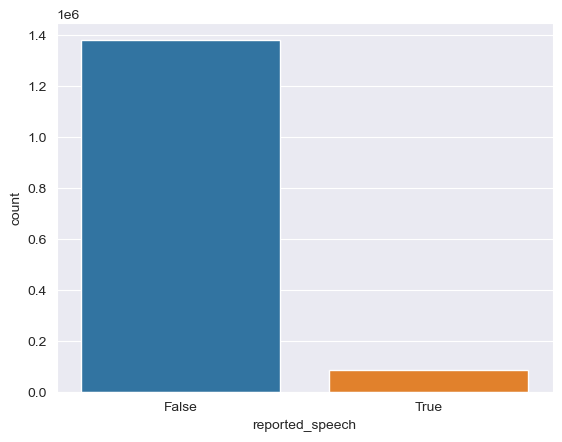

In [26]:
sns.countplot(data=df, x='reported_speech')

## სიხშირეები

In [27]:
df.freq.quantile(q=[ i / 100 for i in range(1, 100)])

0.01       1.0
0.02       1.0
0.03       1.0
0.04       1.0
0.05       1.0
         ...  
0.95     134.0
0.96     186.0
0.97     280.0
0.98     485.0
0.99    1155.0
Name: freq, Length: 99, dtype: float64

In [28]:
df.query('freq > 100').shape[0]

88497

In [29]:
df['freq_category'] = pd.qcut(df.freq, [0, 0.5, 0.9, 1], labels=['low', 'medium', 'high'])

In [30]:
df.groupby(by='freq_category').freq.mean()

freq_category
low          1.265799
medium      10.680539
high      1006.535783
Name: freq, dtype: float64

<Axes: xlabel='freq_category', ylabel='count'>

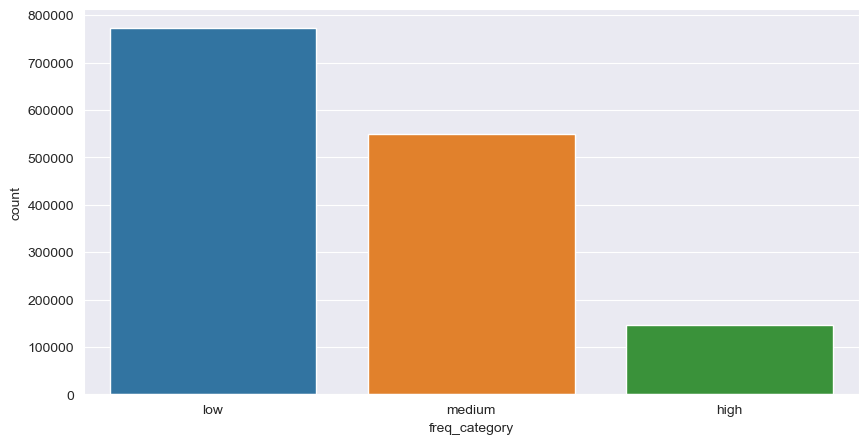

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='freq_category')

In [32]:
df.head()

,word,lemma,pos_tag,freq,word_length,lemma_length,ratio,lemma_length_category,word_length_category,ratio_category,reported_speech,freq_category
0,ამ,ეს,Pron,1041654,2,2,1.0,low,low,equal,False,high
1,ზამთრის,ზამთარი,N,8035,7,7,1.0,low,low,equal,False,high
2,მიწურულს,მიწურული,N,5976,8,8,1.0,medium,low,equal,False,high
3,თითქმის,თითქმის,Adv,62608,7,7,1.0,low,low,equal,False,high
4,სასოწარკვეთილი,სასოწარკვეთილი,A,844,14,14,1.0,high,high,equal,False,high


## ტრეინ / ტესტ დაყოფა

In [36]:
categories = ['pos_tag', 'freq_category', 'ratio_category', 'reported_speech', 'word_length_category', 'lemma_length_category']
classes = df[['pos_tag']]

In [37]:
df.groupby(by=categories).word.count()

pos_tag  freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
A        low            equal           False            low                   low                      3403
                                                                               medium                   2923
                                                                               high                        0
                                                         medium                low                         0
                                                                               medium                   3661
                                                                                                        ... 
V        high           less            True             medium                medium                      0
                                                                               high                        0
                           

In [40]:
train_df, test_df = train_test_split(df, test_size=0.3, stratify=classes, random_state=42)

In [47]:
train_dist = train_df.groupby(by=categories[1:]).word.count() / train_df.word.count()
train_dist

freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
low            equal           False            low                   low                      0.039986
                                                                      medium                   0.010448
                                                                      high                     0.000000
                                                medium                low                      0.000000
                                                                      medium                   0.009303
                                                                                                 ...   
high           less            True             medium                medium                   0.000000
                                                                      high                     0.000000
                                                high                  low   

In [48]:
test_dist = test_df.groupby(by=categories[1:]).word.count() / test_df.word.count()
test_dist

freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
low            equal           False            low                   low                      0.040252
                                                                      medium                   0.010646
                                                                      high                     0.000000
                                                medium                low                      0.000000
                                                                      medium                   0.009238
                                                                                                 ...   
high           less            True             medium                medium                   0.000000
                                                                      high                     0.000000
                                                high                  low   

In [49]:
test_dist /  train_dist  # კატეგორიებში განაწილებების შეფარდებები

freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
low            equal           False            low                   low                      1.006666
                                                                      medium                   1.018932
                                                                      high                          NaN
                                                medium                low                           NaN
                                                                      medium                   0.993063
                                                                                                 ...   
high           less            True             medium                medium                        NaN
                                                                      high                          NaN
                                                high                  low   

In [52]:
train_set_lemmas = set(train_df.lemma.unique())
test_set_lemmas = set(test_df.lemma.unique())

In [57]:
not_in_test = train_set_lemmas - test_set_lemmas
not_in_train = test_set_lemmas - train_set_lemmas
print(f'Number of lemmas in test set not present in train set: {len(not_in_train)}')
print(f'Number of lemmas in train set not present in test set: {len(not_in_test)}')

Number of lemmas in test set not present in train set: 35663
Number of lemmas in train set not present in test set: 97609


In [60]:
train_df.to_csv('csv/train.csv')
test_df.to_csv('csv/test.csv')